# Vamos a clasificar entre estrellas, cuásares y Galaxias

In [38]:
import numpy as np
import matplotlib.pyplot as plt 
from math import floor
import pandas as pd
import random

from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers


In [39]:
def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1, será el porcentaje que mandará a entrenamiento
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val

In [40]:
estelares = pd.read_csv('https://raw.githubusercontent.com/igomezv/MACS_2021_ML_basics_neural_networks/main/data/Skyserver_SQL2_27_2018%206_51_39%20PM.csv')

In [41]:
estelares

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


###### Vamos a usar sólo los atributos u,g,r,i,z

In [42]:
datos=estelares.loc[:,['u','g','r','i','z','class']];datos

,u,g,r,i,z,class
0,19.47406,17.04240,15.94699,15.50342,15.22531,STAR
1,18.66280,17.21449,16.67637,16.48922,16.39150,STAR
2,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY
3,17.76536,16.60272,16.16116,15.98233,15.90438,STAR
4,17.55025,16.26342,16.43869,16.55492,16.61326,STAR
...,...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570,GALAXY
9996,18.27255,17.43849,17.07692,16.71661,16.69897,GALAXY
9997,18.75818,17.77784,17.51872,17.43302,17.42048,STAR
9998,18.88287,17.91068,17.53152,17.36284,17.13988,GALAXY


##### Haremos los vectores one-hot como sigue:
[star, galaxy, qso]

In [43]:
clases=[]
for i in datos['class']:
    if i=='STAR': clases.append([1,0,0])
    if i=='GALAXY': clases.append([0,1,0])
    if i=='QSO': clases.append([0,0,1])
        
clases=np.array(clases);clases

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [117]:
#Así nuestros conjuntos serán 
X=estelares.loc[:,['u','g','r','i','z']];X
#y Y=clases
X=np.array(X)

#### Aquí tenemos nuestro conjunto de datos X, clases
#### Vamos a separarlos en un conjunto para el modelo y en un conjunto para hacer predcciones 

In [131]:
X_modelo,Y_modelo,X_pred,Y_pred=split(X,clases,0.8)

In [132]:
clases.shape

(10000, 3)

Epoch 1/500
200/200 [==============================] - 1s 2ms/step - loss: 1.0747 - accuracy: 0.4198 - val_loss: 1.0251 - val_accuracy: 0.3994
Epoch 2/500
200/200 [==============================] - 0s 1ms/step - loss: 1.0109 - accuracy: 0.4860 - val_loss: 0.9802 - val_accuracy: 0.5119
Epoch 3/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9723 - accuracy: 0.5058 - val_loss: 0.9530 - val_accuracy: 0.5119
Epoch 4/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9456 - accuracy: 0.5007 - val_loss: 0.9377 - val_accuracy: 0.5119
Epoch 5/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9299 - accuracy: 0.4996 - val_loss: 0.9301 - val_accuracy: 0.5119
Epoch 6/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9220 - accuracy: 0.5055 - val_loss: 0.9265 - val_accuracy: 0.5119
Epoch 7/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9234 - accuracy: 0.4963 - val_loss: 0.9249 - val_accuracy: 0.5119

200/200 [==============================] - 0s 1ms/step - loss: 0.9102 - accuracy: 0.5102 - val_loss: 0.9219 - val_accuracy: 0.5119
Epoch 58/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9149 - accuracy: 0.4995 - val_loss: 0.9217 - val_accuracy: 0.5119
Epoch 59/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9161 - accuracy: 0.4924 - val_loss: 0.9214 - val_accuracy: 0.5119
Epoch 60/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9167 - accuracy: 0.4805 - val_loss: 0.9211 - val_accuracy: 0.5119
Epoch 61/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9133 - accuracy: 0.5040 - val_loss: 0.9213 - val_accuracy: 0.5119
Epoch 62/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9178 - accuracy: 0.4789 - val_loss: 0.9210 - val_accuracy: 0.5119
Epoch 63/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9209 - accuracy: 0.4786 - val_loss: 0.9207 - val_accuracy: 0.5119
Epoch

Epoch 114/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9040 - accuracy: 0.4957 - val_loss: 0.9115 - val_accuracy: 0.5125
Epoch 115/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9057 - accuracy: 0.5019 - val_loss: 0.9111 - val_accuracy: 0.5125
Epoch 116/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9119 - accuracy: 0.4910 - val_loss: 0.9107 - val_accuracy: 0.5125
Epoch 117/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.5021 - val_loss: 0.9104 - val_accuracy: 0.5125
Epoch 118/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9152 - accuracy: 0.4812 - val_loss: 0.9098 - val_accuracy: 0.5125
Epoch 119/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9079 - accuracy: 0.4902 - val_loss: 0.9095 - val_accuracy: 0.5125
Epoch 120/500
200/200 [==============================] - 0s 1ms/step - loss: 0.9020 - accuracy: 0.4999 - val_loss: 0.9091 - val_ac

200/200 [==============================] - 0s 1ms/step - loss: 0.8607 - accuracy: 0.5784 - val_loss: 0.8710 - val_accuracy: 0.6037
Epoch 171/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8702 - accuracy: 0.5831 - val_loss: 0.8696 - val_accuracy: 0.5987
Epoch 172/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8620 - accuracy: 0.5780 - val_loss: 0.8686 - val_accuracy: 0.6162
Epoch 173/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8707 - accuracy: 0.5874 - val_loss: 0.8672 - val_accuracy: 0.6156
Epoch 174/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8635 - accuracy: 0.5913 - val_loss: 0.8656 - val_accuracy: 0.6156
Epoch 175/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8596 - accuracy: 0.5973 - val_loss: 0.8641 - val_accuracy: 0.6044
Epoch 176/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8556 - accuracy: 0.5968 - val_loss: 0.8628 - val_accuracy: 0.6025

200/200 [==============================] - 0s 1ms/step - loss: 0.7853 - accuracy: 0.6567 - val_loss: 0.7767 - val_accuracy: 0.6681
Epoch 227/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7725 - accuracy: 0.6611 - val_loss: 0.7753 - val_accuracy: 0.6706
Epoch 228/500
200/200 [==============================] - 0s 2ms/step - loss: 0.7871 - accuracy: 0.6566 - val_loss: 0.7731 - val_accuracy: 0.6700
Epoch 229/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7733 - accuracy: 0.6536 - val_loss: 0.7712 - val_accuracy: 0.6700
Epoch 230/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7727 - accuracy: 0.6573 - val_loss: 0.7695 - val_accuracy: 0.6706
Epoch 231/500
200/200 [==============================] - 0s 2ms/step - loss: 0.7725 - accuracy: 0.6610 - val_loss: 0.7675 - val_accuracy: 0.6687
Epoch 232/500
200/200 [==============================] - 0s 2ms/step - loss: 0.7720 - accuracy: 0.6568 - val_loss: 0.7655 - val_accuracy: 0.6656

200/200 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.6631 - val_loss: 0.6970 - val_accuracy: 0.6694
Epoch 283/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.6643 - val_loss: 0.6961 - val_accuracy: 0.6719
Epoch 284/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.6680 - val_loss: 0.6953 - val_accuracy: 0.6731
Epoch 285/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.6687 - val_loss: 0.6935 - val_accuracy: 0.6706
Epoch 286/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7079 - accuracy: 0.6637 - val_loss: 0.6932 - val_accuracy: 0.6706
Epoch 287/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7063 - accuracy: 0.6565 - val_loss: 0.6919 - val_accuracy: 0.6700
Epoch 288/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7043 - accuracy: 0.6602 - val_loss: 0.6908 - val_accuracy: 0.6719

200/200 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.6628 - val_loss: 0.6574 - val_accuracy: 0.6587
Epoch 339/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.6622 - val_loss: 0.6568 - val_accuracy: 0.6594
Epoch 340/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.6606 - val_loss: 0.6566 - val_accuracy: 0.6581
Epoch 341/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6596 - val_loss: 0.6564 - val_accuracy: 0.6594
Epoch 342/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.6693 - val_loss: 0.6560 - val_accuracy: 0.6600
Epoch 343/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6544 - val_loss: 0.6555 - val_accuracy: 0.6594
Epoch 344/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.6548 - val_loss: 0.6553 - val_accuracy: 0.6562

200/200 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.6814 - val_loss: 0.6415 - val_accuracy: 0.6619
Epoch 395/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6689 - val_loss: 0.6416 - val_accuracy: 0.6656
Epoch 396/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6849 - val_loss: 0.6432 - val_accuracy: 0.6762
Epoch 397/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6696 - val_loss: 0.6412 - val_accuracy: 0.6662
Epoch 398/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6721 - val_loss: 0.6412 - val_accuracy: 0.6700
Epoch 399/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6852 - val_loss: 0.6416 - val_accuracy: 0.6712
Epoch 400/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.6773 - val_loss: 0.6405 - val_accuracy: 0.6700

200/200 [==============================] - 0s 1ms/step - loss: 0.6314 - accuracy: 0.6968 - val_loss: 0.6353 - val_accuracy: 0.6812
Epoch 451/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.6815 - val_loss: 0.6367 - val_accuracy: 0.6925
Epoch 452/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6905 - val_loss: 0.6351 - val_accuracy: 0.6806
Epoch 453/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.6859 - val_loss: 0.6357 - val_accuracy: 0.6862
Epoch 454/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.6911 - val_loss: 0.6350 - val_accuracy: 0.6825
Epoch 455/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.6920 - val_loss: 0.6350 - val_accuracy: 0.6819
Epoch 456/500
200/200 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6877 - val_loss: 0.6348 - val_accuracy: 0.6806

Text(0.5, 1.0, 'Error durante el entrenamiento')

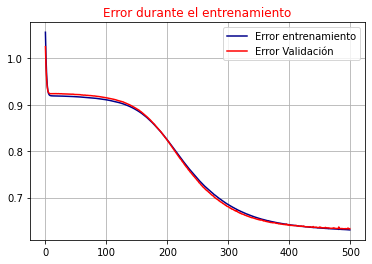

In [225]:
nodos=70
split_size=0.8
taza=0.00001
epocas=500

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X_modelo,Y_modelo,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(5,),use_bias=1,activation='sigmoid')
capa2=layers.Dense(nodos,use_bias=1,activation='sigmoid')
capa3=layers.Dense(nodos,use_bias=1,activation='sigmoid')
capa4=layers.Dense(nodos,use_bias=1,activation='sigmoid')
#para la capa de salida usamos Id como activación
salida=layers.Dense(3,use_bias=1,activation='softmax')

model.add(capa1)
model.add(capa2)
model.add(capa3)
model.add(capa4)
model.add(salida)


loss_fn = losses.SparseCategoricalCrossentropy()

model.compile(optimizers.RMSprop(
    learning_rate=taza),
loss=losses.categorical_crossentropy,
metrics=['accuracy'])

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),epochs=epocas,shuffle=True)
#batch_size=512)

error=history.history['loss']
exac=history.history['val_loss']

epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

##### Ahora vamos a probar con el conjunto que reservamos para hacer predicciones

In [229]:
predicciones=model.predict(X)
#Ahora tomamos la máxima probabilidad de cada sample y lo llevamos a la forma one-hot
#for j in predicciones:
    #j[np.argmax(j)]=1
    #j[j<1]=0
#Y por último veamos cuántos acertó comparando predicciones con Y_pred
s=0
for i in range(len(clases)):
    if np.argmax(predicciones[i])==np.argmax(clases[i]):
        s=s+1
print("El porcentaje de aciertos fue del",s/len(Y_pred),"porciento")

El porcentaje de aciertos fue del 3.4805 porciento


In [230]:
predicciones

array([[7.1073040e-02, 9.2869073e-01, 2.3626658e-04],
       [4.6191630e-01, 5.2714545e-01, 1.0938249e-02],
       [3.3120459e-01, 6.6416788e-01, 4.6274327e-03],
       ...,
       [7.3039299e-01, 1.2776364e-01, 1.4184339e-01],
       [6.8968797e-01, 2.5466686e-01, 5.5645216e-02],
       [9.6123680e-02, 9.0348238e-01, 3.9401450e-04]], dtype=float32)

In [218]:
predicciones

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])